### [ Scatter(산점도) Plot 살펴보기]  
- 용도 : 2개 이상의 컬럼들의 관계 정도를 시각화(correlation)
- corr() 메서드와 같은 류

In [148]:
import pandas as pd
import numpy as np

In [149]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [150]:
df.corr()

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [151]:
df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [152]:
df.corr() 

,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


In [153]:
df.corr(numeric_only=True,min_periods=3) # 최소한의 데이터 갯수를 3개로 지정

,dogs,cats
dogs,1.0,NaN
cats,NaN,1.0


1. mpg: continuous2. 
cylinders: multi-valued discrete3. 
displacement: continuou4. s
horsepower: continuo5. us
weight: continu6. ous
acceleration: contin7. uous
model year: multi-valued dis8. crete
origin: multi-valued di9. screte
car name: string (unique for each instance)

In [154]:
file='../DATA/auto-mpg.csv'
mpgDF=pd.read_csv(file,sep='\s+', names=['mps','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

데이터 정보 확인  
- 전체 데이터 간략 정보 확인 => info()

In [155]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mps           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [156]:
mpgDF.head(1)

,mps,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu


- 실제 데이터의 값의 종류 즉 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값(이상치) 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입

In [157]:
for col in mpgDF.columns:
    print(f'[{col}]===================')
    print(mpgDF[col].nunique(), mpgDF[col].unique(), sep='\n', end='\n\n') # 확인해보니 horsepower과 문자열이므로 데이터 타입을 수정한다

[mps]===================
129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[cylinders]===================
5
[8 4 6 3 5]

[displacement]===================
82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70

In [158]:
#dropna 파라미터 설정으로 컬럼의 결측치 데이터 수까지 확인 가능
mpgDF['origin'].nunique(dropna=False), mpgDF['origin'].unique()

(3, array([1, 3, 2], dtype=int64))

데이터 전처리 <hr>  
-결측치 체크 => 꼭 NaN이 아닐 수 있음  
-중복값 체크   
-이상치 체크 => 정말 컬럼의 범ㅁ위를 벗어난 값, 잘못 입력된 값  
-데이터 표준화 => 자료형, 데이터 단위 일치  
-데이터 정규화 => 데이터의 크기 일치  

In [159]:
# 결측치 체크 및 처리 ==> 이상한 값 즉 이상치 NaN 변환 후 처리
mpgDF.horsepower.value_counts()['?']

6

In [160]:
mpgDF['horsepower'].replace('?', np.nan, inplace=True)

In [161]:
mpgDF.isnull().sum()

mps             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [162]:
# 데이터 표준화 => horsepower의 자료형을 실제 데이터와 일치
mpgDF.horsepower=mpgDF.horsepower.astype("float32")
mpgDF.dtypes

mps             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [163]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), # cut : 배열을 세 개의 라벨로 나눈 후, 각각의 값에 라벨을 할당한다
       3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [164]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True) #retbins : 경계값 출력할지 말지 정한다

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [165]:
out,ret = pd.cut(mpgDF.horsepower, bins=3, labels=['저마력','중마력','고마력'], retbins=True) # 읽어들인 데이터를 가지고 분석
# out, ret이 나온다(ret은 구간 정보)

In [166]:
#범주형을 숫자형으로 바꿔야 하는 순간이 온다
s=pd.Series(list('abca'))

In [167]:
pd.get_dummies(s, dtype="int32") # 컴퓨터가 이해하기 쉬운 형태로 변환한다

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


데이터 표준화  => 범주형 ==> 연속형/수치화 변환 : One-Hot-Encoding방식

In [168]:
#pandas.get_dummies() 함수
#mpgDF 예) origin 컬럼을 변환 ==> 'USA','EU','JPN'반환
pd.get_dummies(mpgDF.origin)
mpgDF['origin'].replace({1:"USA", 2:"EU",3:"JPN"}, inplace=True)
mpgDF.dtypes


mps             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [169]:
mpgDF.origin=mpgDF.origin.astype("category")
mpgDF.dtypes

mps              float64
cylinders          int64
displacement     float64
horsepower       float32
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

In [170]:
pd.get_dummies(mpgDF.origin, dtype="int32")

,EU,JPN,USA
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [171]:
mpgDF.horsepower=out # cut을 사용하여 나온 Series데이터를 원래 열 값에 대입하기
mpgDF.dtypes # 타입을 비교하면, cut을 사용한 Series가 들어갔기 때문에 category가 된다

mps              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

In [172]:
# 데이터 분석  
# 연비 mpg 컬럼과 관계가 가장 높은 컬럼
corrDF=mpgDF.corr(numeric_only=True)
corrDF
#corrDF['mps'][1:].sort_values()

,mps,cylinders,displacement,weight,acceleration,model year
mps,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


In [173]:
### 시각화로 연비 mpg 관계확인--------------------------
import matplotlib.pyplot as plt
def scatterplot(sr1, sr2) :
    plt.scatter(sr1,sr2) # scatter에는 시리즈가 들어간다
    plt.title(f'{sr1.name} - {sr2.name} {round(corrDF[sr1.name][sr2.name],2)}')
    plt.xlabel(f'{sr1.name}')
    plt.ylabel(f'{sr2.name}')
    plt.show()

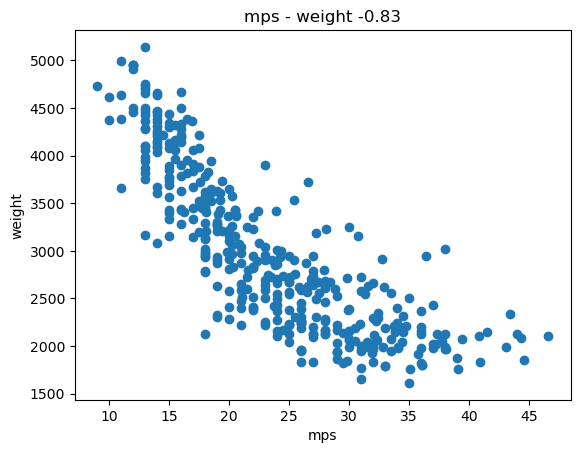

In [174]:
scatterplot(mpgDF['mps'], mpgDF['weight'])

In [175]:
originSR=mpgDF['origin'].value_counts()
originSR.index, originSR.values

(CategoricalIndex(['USA', 'JPN', 'EU'], categories=['EU', 'JPN', 'USA'], ordered=False, dtype='category', name='origin'),
 array([249,  79,  70], dtype=int64))

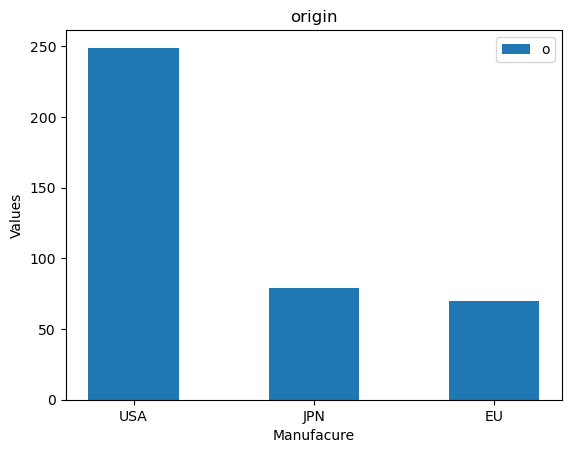

In [176]:
plt.bar(originSR.index, originSR.values, width=0.5) # 배열과 배열을 담는다
plt.title('origin')
plt.xlabel('Manufacure')
plt.ylabel('Values')
plt.legend('origin!')

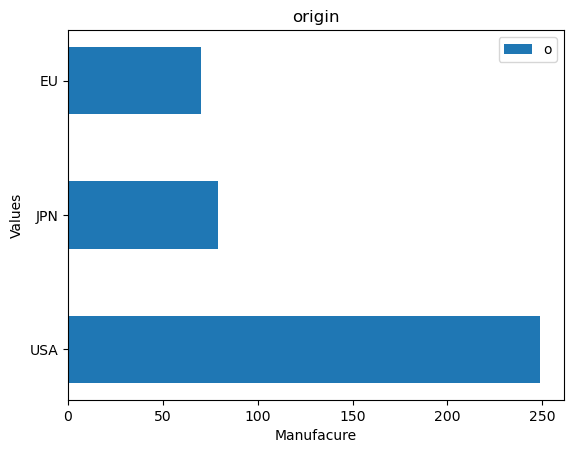

In [177]:
plt.barh(originSR.index, originSR.values, height=0.5) # 배열과 배열을 담는다
plt.title('origin')
plt.xlabel('Manufacure')
plt.ylabel('Values')
plt.legend('origin!')

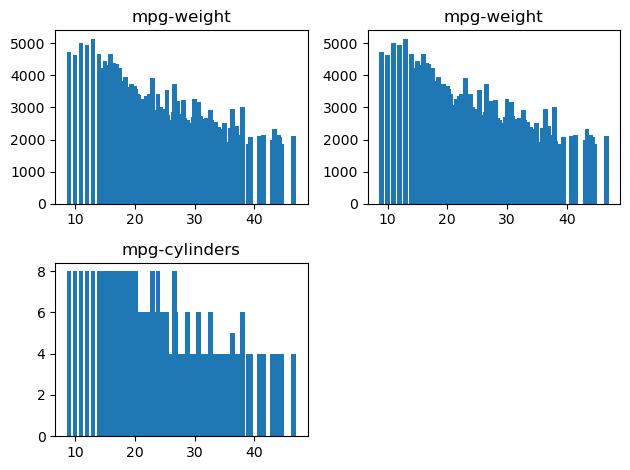

In [178]:
plt.subplot(2,2,3) # 행, 열 , 인덱스
plt.bar(mpgDF['mps'], mpgDF["cylinders"])
plt.title("mpg-cylinders")
plt.subplot(2,2,1) # 행, 열 , 인덱스
plt.bar(mpgDF['mps'], mpgDF["weight"])
plt.title("mpg-weight")
plt.subplot(2,2,2) # 행, 열 , 인덱스
plt.bar(mpgDF['mps'], mpgDF["weight"])
plt.title("mpg-weight")
plt.tight_layout() # 겹칮 않고 간격을 줘서 만들어준다

plt.show()

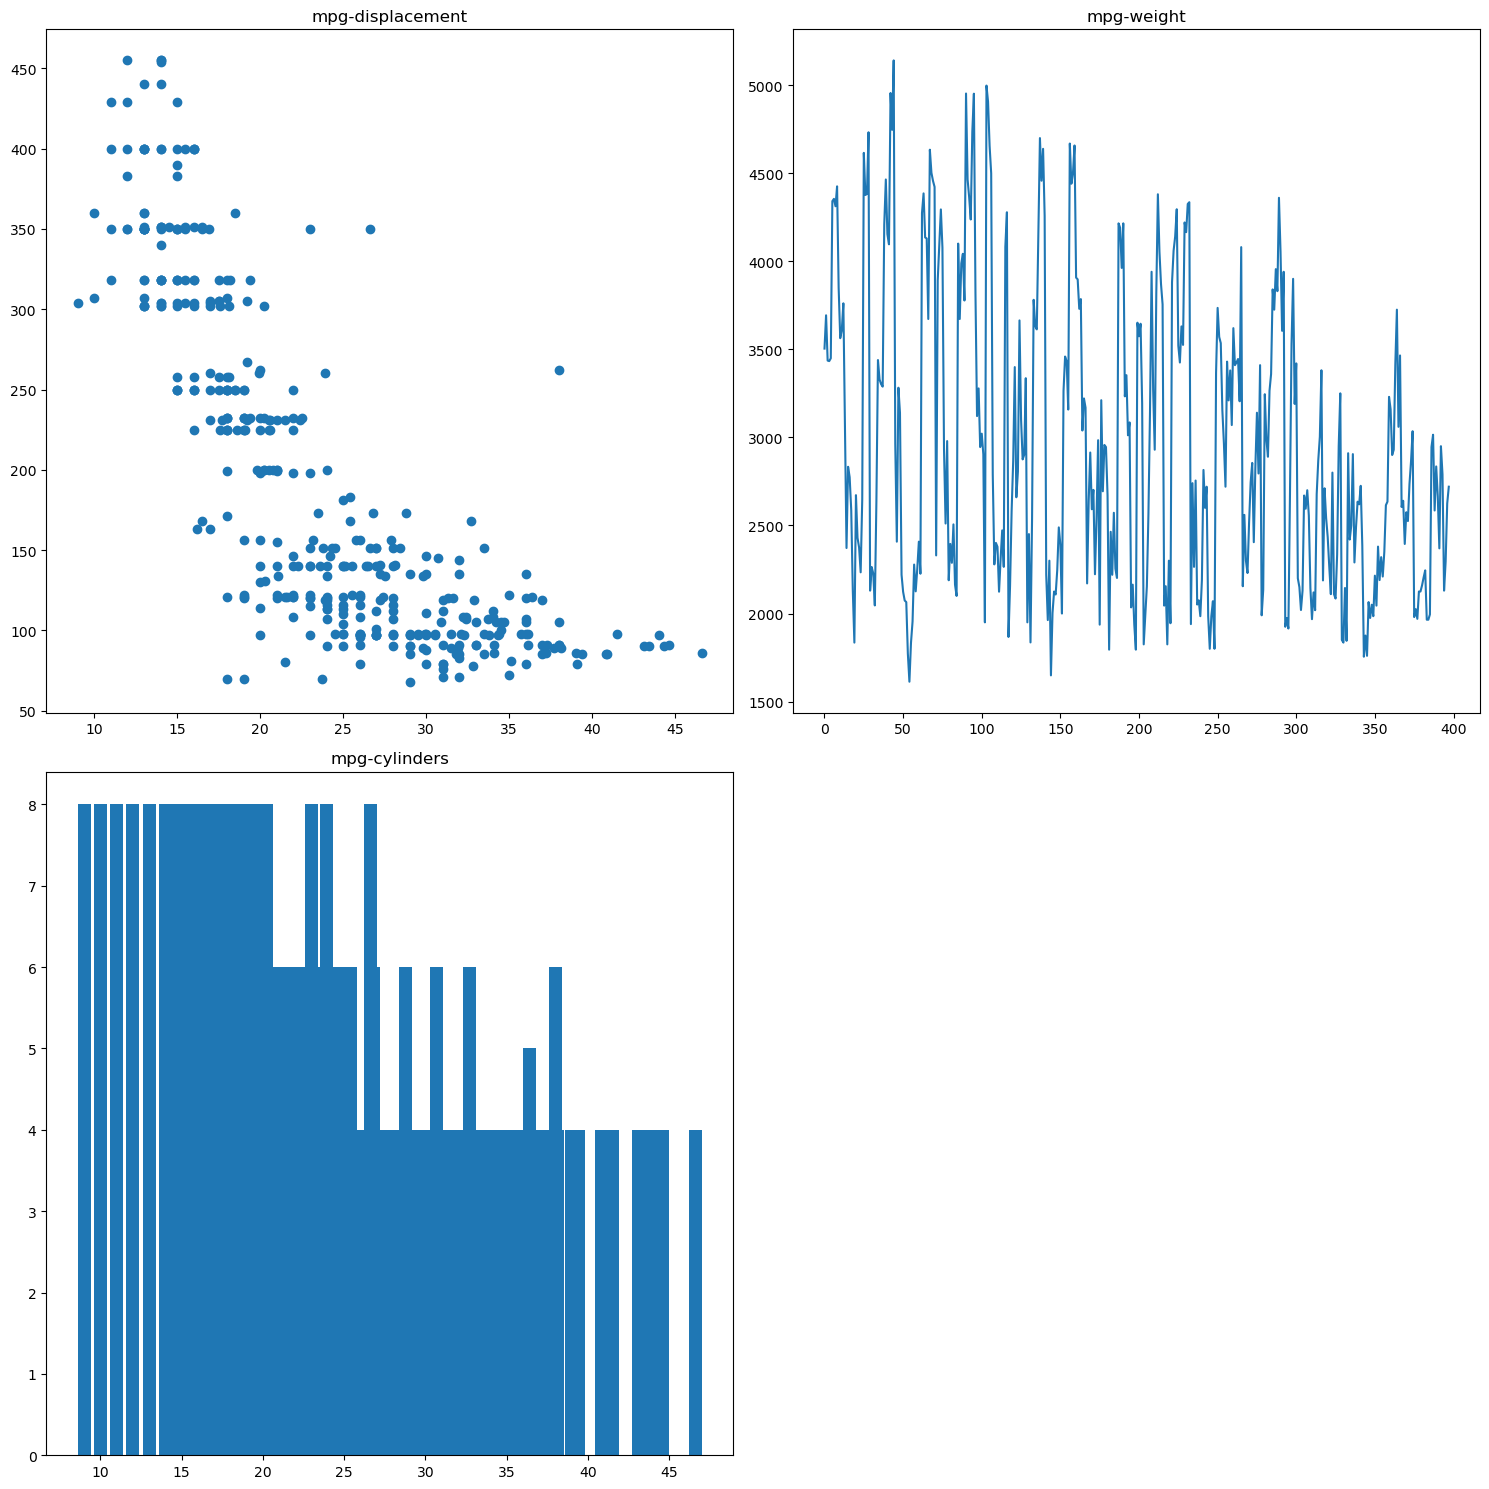

In [179]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)        #2행 2열 중 첫 번째
plt.scatter(mpgDF['mps'], mpgDF['displacement'])
plt.title("mpg-displacement")

plt.subplot(2,2,2)          # 2행 2열 중 두 번째
plt.plot(mpgDF['weight'])
plt.title("mpg-weight")

plt.subplot(2,2,3)          # 2행 2열 중 세 번째
plt.bar(mpgDF['mps'], mpgDF['cylinders'])
plt.title("mpg-cylinders")

plt.tight_layout() # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()

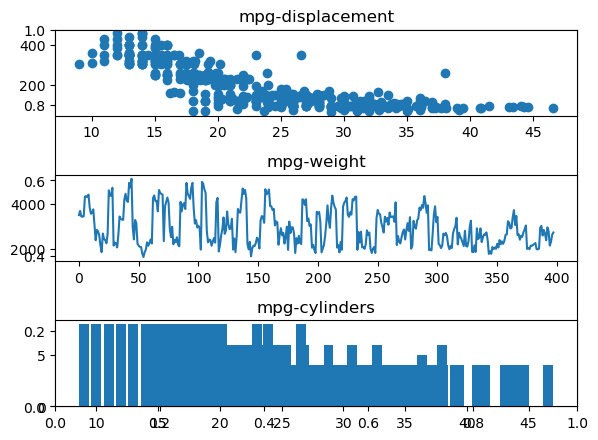

In [180]:
fig, ax = plt.subplots()

ax1=fig.add_subplot(311)      
plt.scatter(mpgDF['mps'], mpgDF['displacement'])
plt.title("mpg-displacement")

ax2=fig.add_subplot(312)           
plt.plot(mpgDF['weight'])
plt.title("mpg-weight")

ax3=fig.add_subplot(313)        
plt.bar(mpgDF['mps'], mpgDF['cylinders'])
plt.title("mpg-cylinders")

plt.tight_layout() # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()

In [181]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

Text(0.5, 1.0, 'Simple plot')

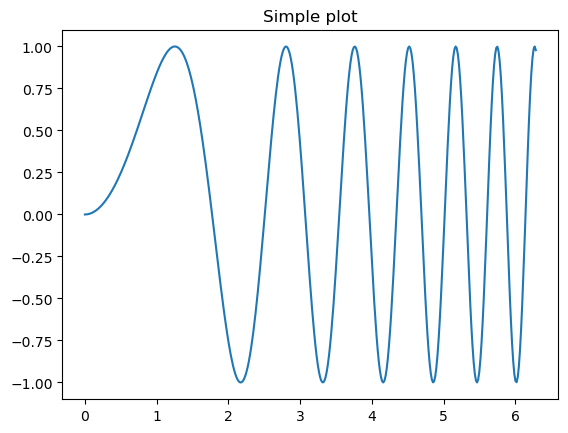

In [182]:
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

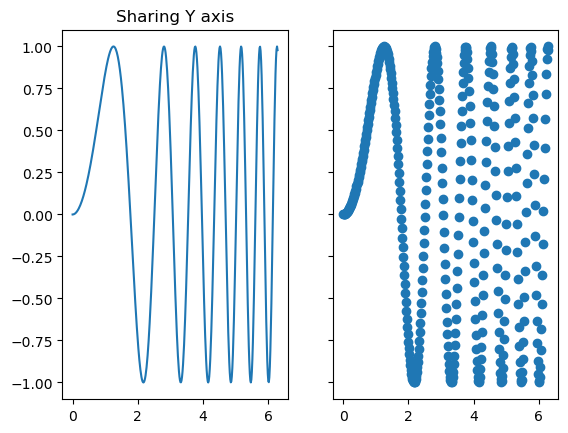

In [183]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # y축을 공유하겠다는 말이다, unpacking으로 받았다
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

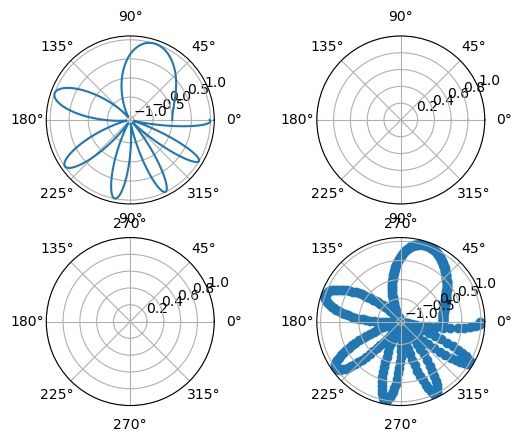

In [184]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar")) # 이번에는 packing으로 받았다
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

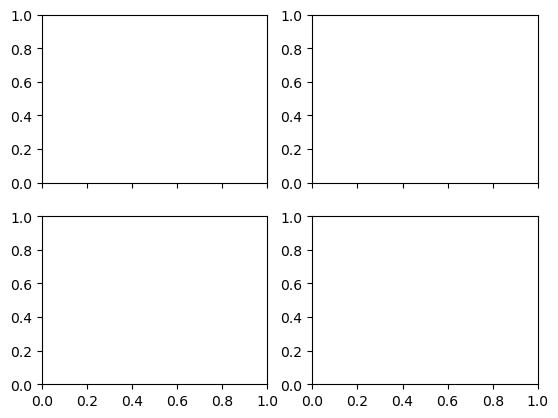

In [186]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

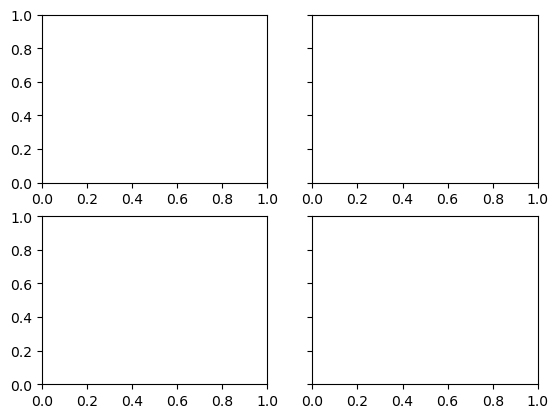

In [187]:
# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

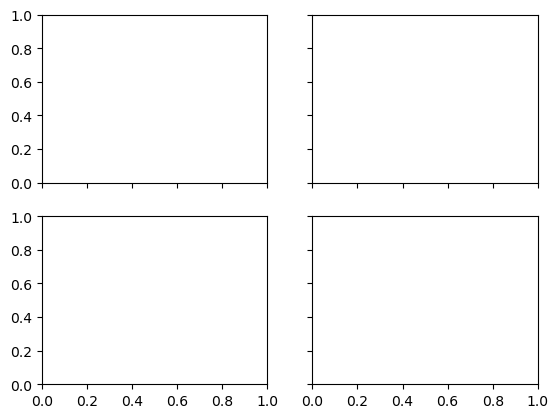

In [188]:
# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

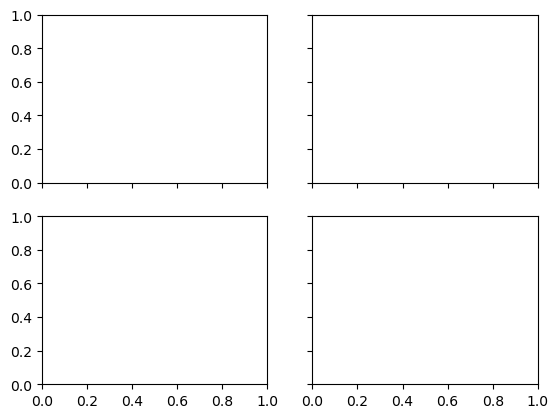

In [189]:
# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True) # x,y공유하겠다는 말이다

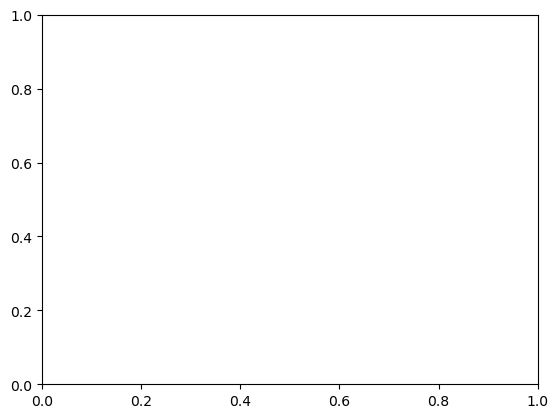

In [190]:
# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)